In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.head().T

,0,1,2,3,4
male,1.00,0.00,1.00,0.00,0.0
age,39.00,46.00,48.00,61.00,46.0
education,4.00,2.00,1.00,3.00,3.0
currentSmoker,0.00,0.00,1.00,1.00,1.0
cigsPerDay,0.00,0.00,20.00,30.00,23.0
BPMeds,0.00,0.00,0.00,0.00,0.0
prevalentStroke,0.00,0.00,0.00,0.00,0.0
prevalentHyp,0.00,0.00,0.00,1.00,0.0
diabetes,0.00,0.00,0.00,0.00,0.0
totChol,195.00,250.00,245.00,225.00,285.0


In [4]:
from psycopg2 import connect
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

params = {
    'host': '35.163.243.16',
    'user': 'ubuntu',
    'port': 5432
}

# Connect and create database, disconnect, and reconnect to the right database
connection = connect(**params, dbname='ubuntu')
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
#connection.cursor().execute('CREATE DATABASE framingham;')
connection.close()

In [5]:
from sqlalchemy import create_engine
connection_string = f'postgres://ubuntu:{params["host"]}@{params["host"]}:{params["port"]}/metis_project3_db'
engine = create_engine(connection_string)
#df.to_sql('framingham', engine, index=False)

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
df_cols = df.columns
df_cols

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
ls = []
for col in df_cols:
    ls.append(str(df[col].isna().unique()))
ls

['[False]',
 '[False]',
 '[False  True]',
 '[False]',
 '[False  True]',
 '[False  True]',
 '[False]',
 '[False]',
 '[False]',
 '[False  True]',
 '[False]',
 '[False]',
 '[False  True]',
 '[False  True]',
 '[False  True]',
 '[False]']

In [9]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
df.education.isna().value_counts()

False    4135
True      105
Name: education, dtype: int64

In [11]:
df.cigsPerDay.isna().value_counts()

False    4211
True       29
Name: cigsPerDay, dtype: int64

In [12]:
df.BPMeds.isna().value_counts()

False    4187
True       53
Name: BPMeds, dtype: int64

In [13]:
df[df_cols[9]].isna().value_counts()

False    4190
True       50
Name: totChol, dtype: int64

In [14]:
df[df_cols[12]].isna().value_counts()

False    4221
True       19
Name: BMI, dtype: int64

In [15]:
df[df_cols[13]].isna().value_counts()

False    4239
True        1
Name: heartRate, dtype: int64

In [16]:
df[df_cols[14]].isna().value_counts()

False    3852
True      388
Name: glucose, dtype: int64

In [17]:
df[df_cols[15]].isna().value_counts()

False    4240
Name: TenYearCHD, dtype: int64

In [18]:
#sklearn.impute.iterativeimputer
#pandas.get_dummies

In [19]:
# Make Education dummies
edu_names = ['edu_someHS','edu_HS','edu_someCollege','edu_college','edu_nan']
edu_dummy = pd.get_dummies(df['education'], dummy_na=True)
edu_dummy.head()

,1.0,2.0,3.0,4.0,NaN
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [20]:
for i in range(4):
    edu_dummy.rename({i+1:edu_names[i]},axis=1,inplace=True)

edu_dummy.rename({'nan':'edu_nan'},axis=1,inplace=True)

In [21]:
#check to see if ppl have entered double lvls of education
edu_dummy_T = edu_dummy.T
for i in edu_dummy_T.columns:
    if sum(edu_dummy_T[i]) != 1:
        print(i)

In [22]:
df = pd.concat([df, edu_dummy], axis=1)

In [23]:
df.drop('education',axis=1,inplace=True)
df.head().T

,0,1,2,3,4
male,1.00,0.00,1.00,0.00,0.0
age,39.00,46.00,48.00,61.00,46.0
currentSmoker,0.00,0.00,1.00,1.00,1.0
cigsPerDay,0.00,0.00,20.00,30.00,23.0
BPMeds,0.00,0.00,0.00,0.00,0.0
prevalentStroke,0.00,0.00,0.00,0.00,0.0
prevalentHyp,0.00,0.00,0.00,1.00,0.0
diabetes,0.00,0.00,0.00,0.00,0.0
totChol,195.00,250.00,245.00,225.00,285.0
sysBP,106.00,121.00,127.50,150.00,130.0


In [24]:
# connection = connect(**params, dbname='framingham')
# cursor = connection.cursor()
# cursor.execute("""SELECT "age" FROM framingham LIMIT 20;""")
# cursor.fetchall()

In [25]:
#identify whether cigs per day in NaN and they are not a current smoker.
df_cigs = df.cigsPerDay.isna()
df[df_cigs]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,edu_someHS,edu_HS,edu_someCollege,edu_college,NaN
131,1,43,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0,0,0,0,1,0
139,1,49,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1,0,0,0,1,0
1046,0,49,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0,1,0,0,0,0
1292,1,42,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0,0,0,1,0,0
1347,0,58,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0,0,0,0,1,0
1451,1,54,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0,1,0,0,0,0
1497,1,55,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.0,0,1,0,0,0,0
1610,0,61,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0,1,0,0,0,0
1625,0,49,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0,0,1,0,0,0
1870,0,47,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0,0,1,0,0,0


In [26]:
import sklearn
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [27]:
imputer = sklearn.impute.IterativeImputer()

In [28]:
imputer.fit(df.values)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, tol=0.001, verbose=0)

In [29]:
x_imputed = imputer.transform(df.values)

df_imputed = pd.DataFrame(x_imputed, columns=df.columns)

In [30]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 20 columns):
male               4240 non-null float64
age                4240 non-null float64
currentSmoker      4240 non-null float64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null float64
prevalentHyp       4240 non-null float64
diabetes           4240 non-null float64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null float64
edu_someHS         4240 non-null float64
edu_HS             4240 non-null float64
edu_someCollege    4240 non-null float64
edu_college        4240 non-null float64
nan                4240 non-null float64
dtypes: float64(20)
memory usage: 662.6 KB


In [31]:
print(len(df_imputed.columns),len(df.columns))

20 20


In [32]:
df_imputed.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,edu_someHS,edu_HS,edu_someCollege,edu_college,NaN
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
int_cols = [male,age,currentSmoker,cigsPerDay,BPMeds	prevalentStroke	prevalentHyp	diabetes	totChol	sysBP	diaBP	BMI	heartRate	glucose	TenYearCHD	edu_someHS	edu_HS	edu_someCollege	edu_college,NaN]
df_imputed.age = df_imputed.age.astype(int)

In [67]:
df_imputed.head()

0    39
1    46
2    48
3    61
4    46
Name: age, dtype: int64

In [36]:
df_imputed.head(50)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,edu_someHS,edu_HS,edu_someCollege,edu_college,NaN
0,1.0,39,0.0,0.0,0.000000,0.0,0.0,0.0,195.000000,106.0,70.0,26.97,80.0,77.000000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,46,0.0,0.0,0.000000,0.0,0.0,0.0,250.000000,121.0,81.0,28.73,95.0,76.000000,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,48,1.0,20.0,0.000000,0.0,0.0,0.0,245.000000,127.5,80.0,25.34,75.0,70.000000,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,61,1.0,30.0,0.000000,0.0,1.0,0.0,225.000000,150.0,95.0,28.58,65.0,103.000000,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,46,1.0,23.0,0.000000,0.0,0.0,0.0,285.000000,130.0,84.0,23.10,85.0,85.000000,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,43,0.0,0.0,0.000000,0.0,1.0,0.0,228.000000,180.0,110.0,30.30,77.0,99.000000,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,63,0.0,0.0,0.000000,0.0,0.0,0.0,205.000000,138.0,71.0,33.11,60.0,85.000000,1.0,1.0,0.0,0.0,0.0,0.0
7,0.0,45,1.0,20.0,0.000000,0.0,0.0,0.0,313.000000,100.0,71.0,21.68,79.0,78.000000,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,52,0.0,0.0,0.000000,0.0,1.0,0.0,260.000000,141.5,89.0,26.36,76.0,79.000000,0.0,1.0,0.0,0.0,0.0,0.0
9,1.0,43,1.0,30.0,0.000000,0.0,1.0,0.0,225.000000,162.0,107.0,23.61,93.0,88.000000,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
len(df_imputed.columns[0])

4

# EDA

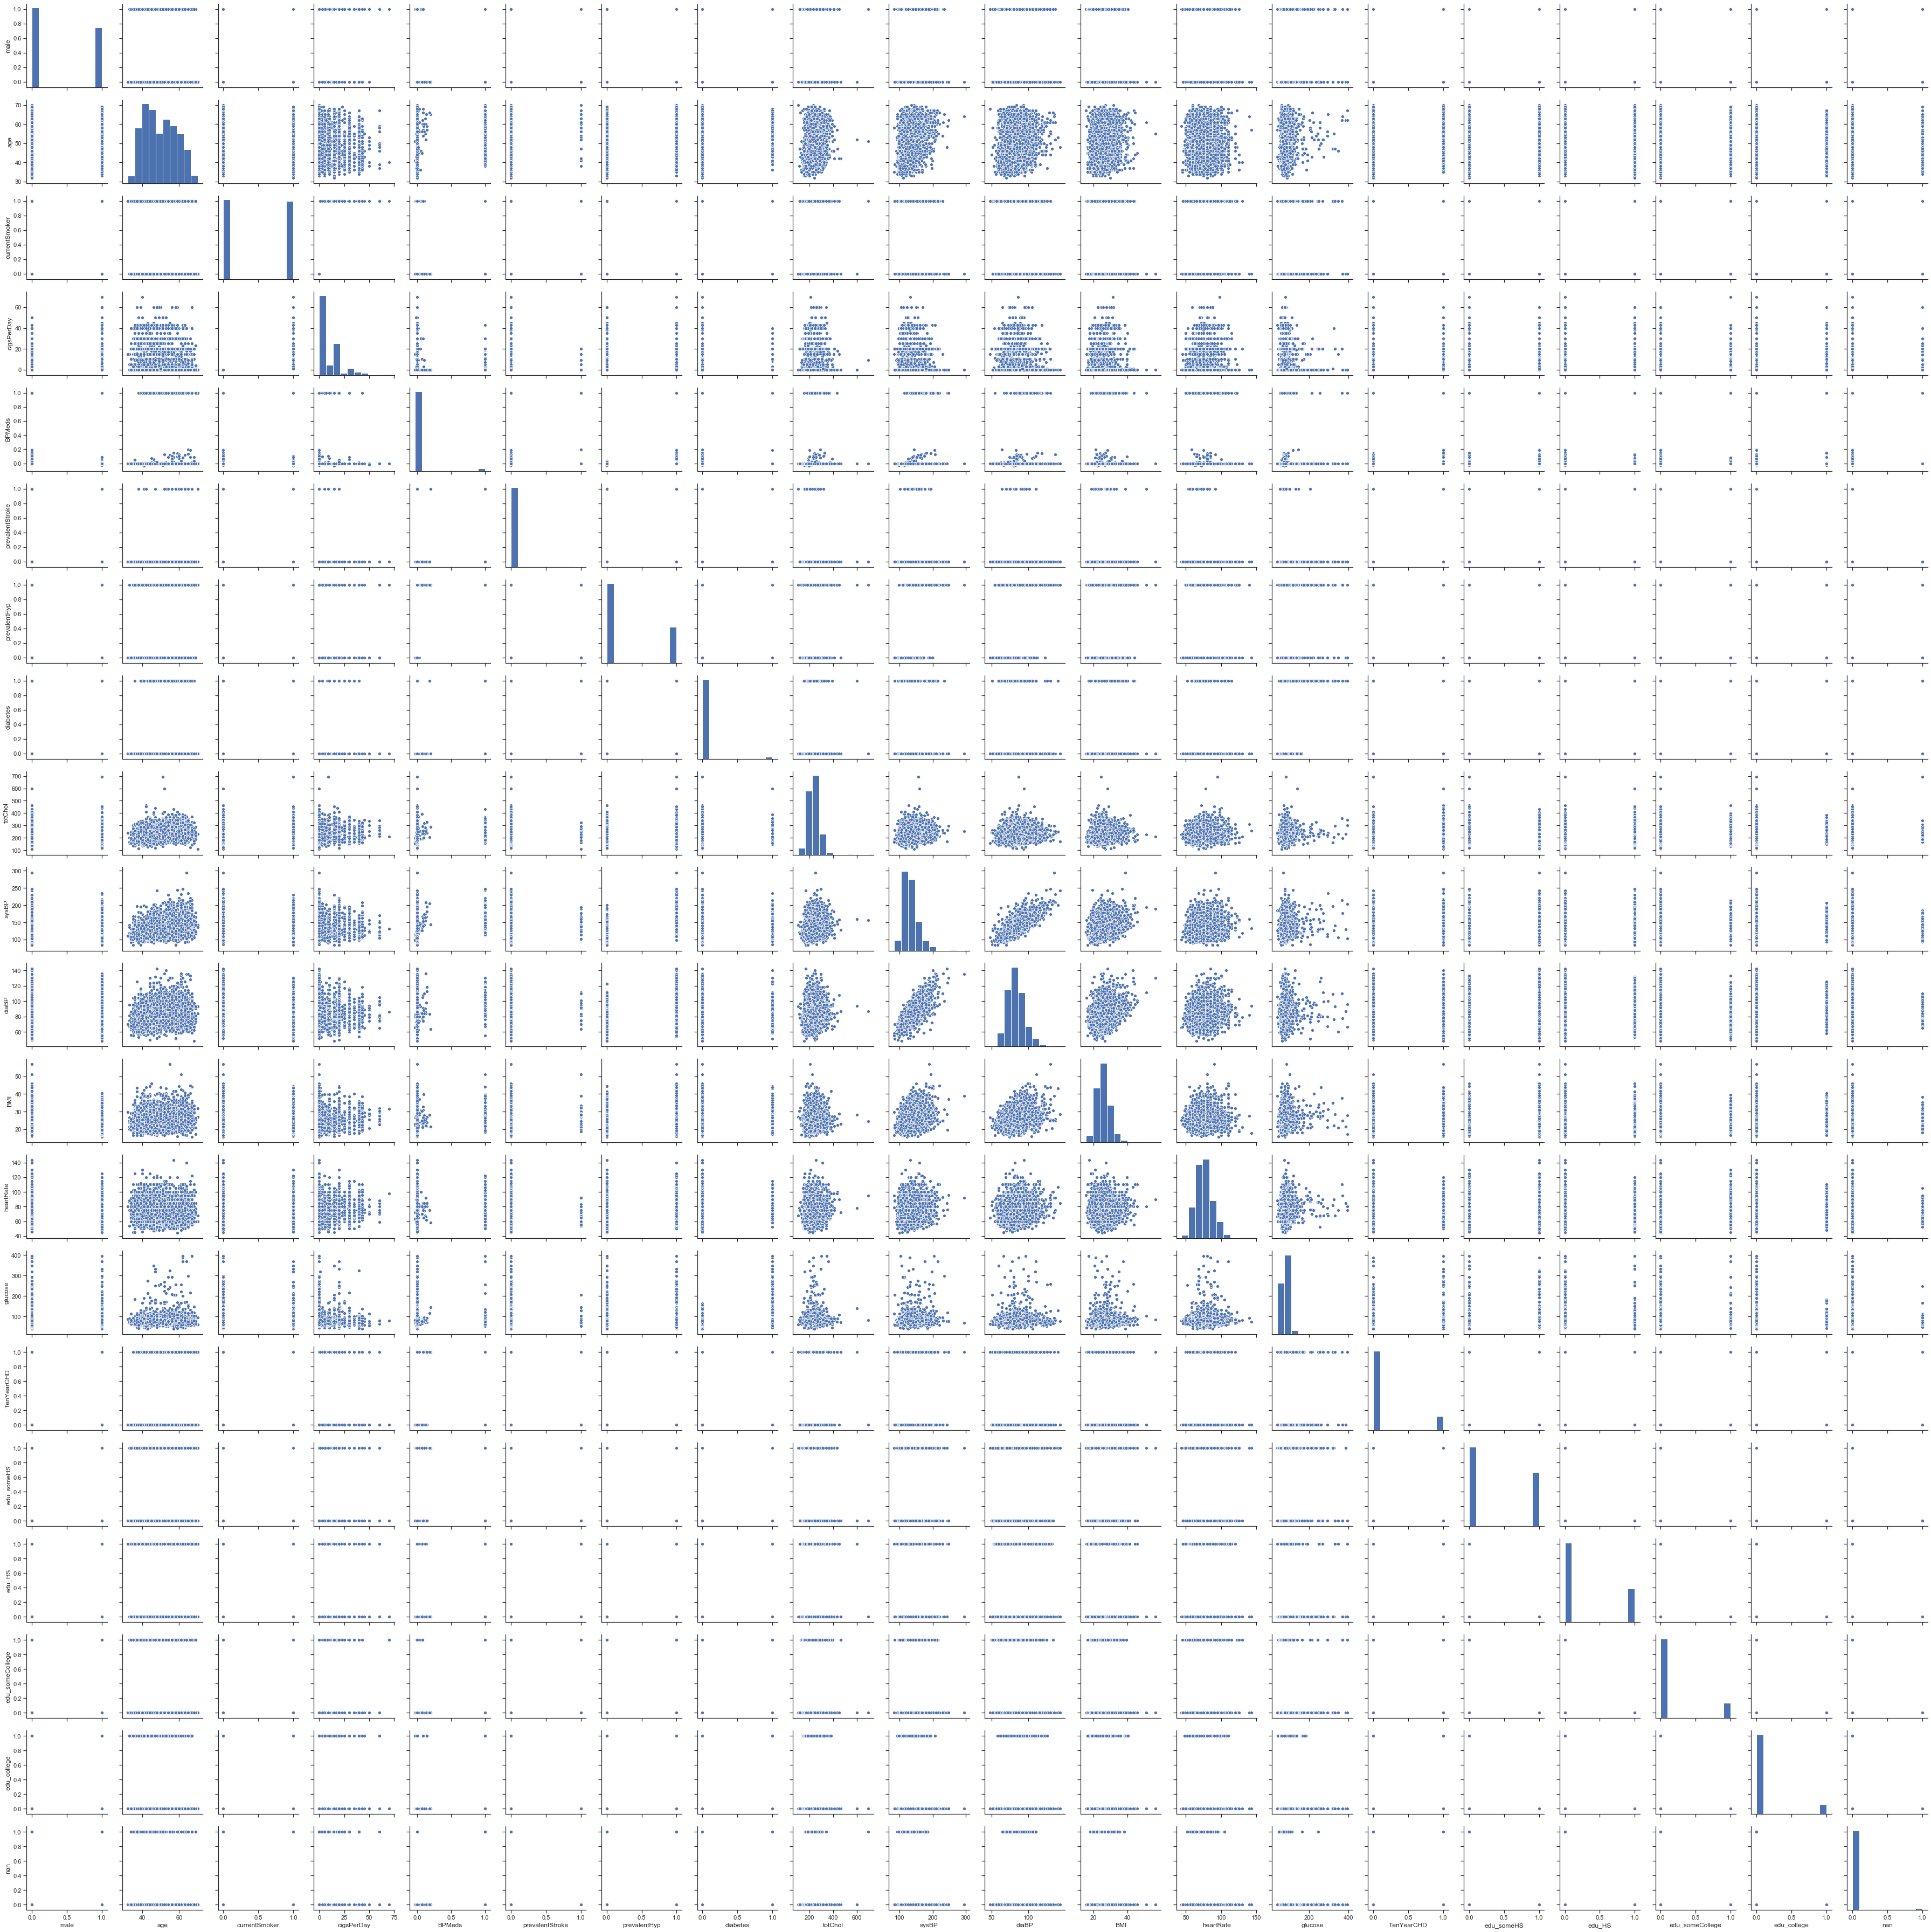

In [64]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
pp = sns.pairplot(df_imputed)
pp